In [1]:
import pandas as pd
import plotly_plate
import seaborn as sns
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./results_per_label_Plate02.csv", index_col=0)

In [3]:
df

,plate,well_id,filepath,ObjectNumber,Mtb_infected,Intensity_MeanIntensity_Cytoplasm_LC3B_ch0,Intensity_MaxIntensity_Cytoplasm_LC3B_ch0,Intensity_MinIntensity_Cytoplasm_LC3B_ch0,Intensity_StdIntensity_Cytoplasm_LC3B_ch0,Intensity_MeanIntensity_Cytoplasm_GAL3_ch1,...,Intensity_MinIntensity_Cytoplasm_Chmp4B_ch2,Intensity_StdIntensity_Cytoplasm_Chmp4B_ch2,Intensity_MeanIntensity_Cytoplasm_Mtb_ch3,Intensity_MaxIntensity_Cytoplasm_Mtb_ch3,Intensity_MinIntensity_Cytoplasm_Mtb_ch3,Intensity_StdIntensity_Cytoplasm_Mtb_ch3,Intensity_MeanIntensity_Cytoplasm_DAPI_ch5,Intensity_MaxIntensity_Cytoplasm_DAPI_ch5,Intensity_MinIntensity_Cytoplasm_DAPI_ch5,Intensity_StdIntensity_Cytoplasm_DAPI_ch5
0,Plate01,A1,X:\Lisa\siMtb screen I_LØ\Plate 01_Nuc\Plate01...,1,False,200.192308,377.0,96.0,61.501668,309.119329,...,82.0,15.975232,120.767258,158.0,84.0,11.634857,1010.800789,3336.0,83.0,1000.415349
1,Plate01,A1,X:\Lisa\siMtb screen I_LØ\Plate 01_Nuc\Plate01...,2,False,569.562451,6387.0,126.0,456.508787,1735.012569,...,102.0,38.719041,121.738413,173.0,71.0,12.210509,612.697565,2975.0,87.0,806.084036
2,Plate01,A1,X:\Lisa\siMtb screen I_LØ\Plate 01_Nuc\Plate01...,3,False,174.533742,297.0,99.0,46.858000,172.760736,...,91.0,43.532966,121.478528,143.0,91.0,11.408391,603.380368,2169.0,94.0,627.580574
3,Plate01,A1,X:\Lisa\siMtb screen I_LØ\Plate 01_Nuc\Plate01...,4,False,176.026846,344.0,88.0,49.818747,151.057047,...,91.0,15.095860,124.441834,177.0,83.0,11.993868,795.836689,3522.0,98.0,819.707689
4,Plate01,A1,X:\Lisa\siMtb screen I_LØ\Plate 01_Nuc\Plate01...,5,False,184.797872,413.0,106.0,35.308777,365.693262,...,90.0,15.736980,120.926714,167.0,73.0,12.030520,219.879433,1390.0,77.0,202.492342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202299,Plate01,H1,X:\Lisa\siMtb screen I_LØ\Plate 01_Nuc\Plate01...,2173,False,158.925439,267.0,105.0,28.809852,246.421053,...,91.0,22.773717,122.914474,164.0,82.0,12.912973,427.333333,2407.0,94.0,399.635940
202300,Plate01,H1,X:\Lisa\siMtb screen I_LØ\Plate 01_Nuc\Plate01...,2174,False,146.218615,222.0,101.0,22.666742,198.175325,...,82.0,17.159299,120.487013,153.0,82.0,11.745628,254.826840,1304.0,87.0,208.001530
202301,Plate01,H1,X:\Lisa\siMtb screen I_LØ\Plate 01_Nuc\Plate01...,2175,False,163.247312,307.0,105.0,41.702519,188.376344,...,96.0,14.958634,122.454301,168.0,85.0,11.672758,651.526882,2349.0,89.0,659.542882
202302,Plate01,H1,X:\Lisa\siMtb screen I_LØ\Plate 01_Nuc\Plate01...,2176,False,158.105967,329.0,91.0,41.798016,156.388889,...,81.0,13.525597,122.327160,176.0,80.0,12.209251,243.595679,1158.0,89.0,208.258214


In [11]:
# Remove Mtb mean values above 250 to clip outliers
df = df[df["Intensity_MeanIntensity_Cytoplasm_Mtb_ch3"] <= 250]
df = df[df["Intensity_MeanIntensity_Cytoplasm_Chmp4B_ch2"] <= 1100]

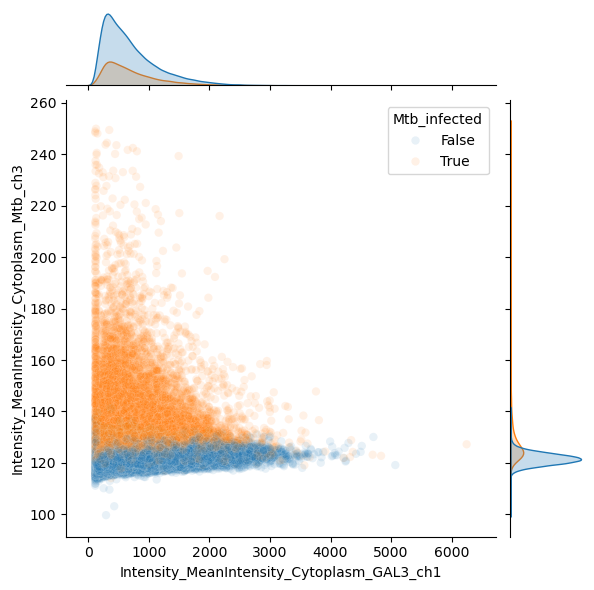

In [12]:
sns.jointplot(
    x="Intensity_MeanIntensity_Cytoplasm_GAL3_ch1",
    y="Intensity_MeanIntensity_Cytoplasm_Mtb_ch3",
    data=df,
    hue="Mtb_infected",
    kind="scatter",
    alpha= 0.1  # adjust transparency (0=transparent, 1=opaque)
)

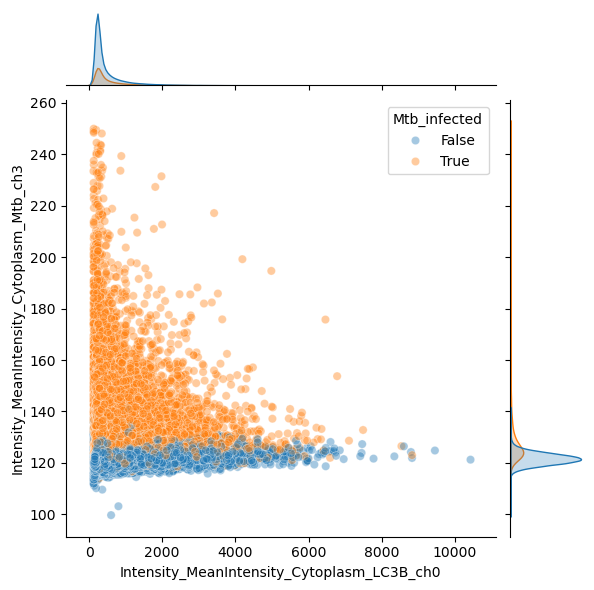

In [13]:
sns.jointplot(
    x="Intensity_MeanIntensity_Cytoplasm_LC3B_ch0",
    y="Intensity_MeanIntensity_Cytoplasm_Mtb_ch3",
    data=df,
    hue="Mtb_infected",
    kind="scatter",
    alpha= 0.4  # adjust transparency (0=transparent, 1=opaque)
)

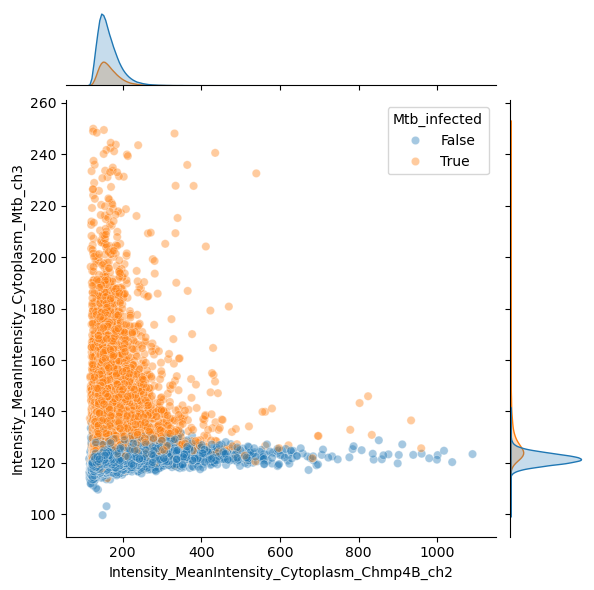

In [14]:
sns.jointplot(
    x="Intensity_MeanIntensity_Cytoplasm_Chmp4B_ch2",
    y="Intensity_MeanIntensity_Cytoplasm_Mtb_ch3",
    data=df,
    hue="Mtb_infected",
    kind="scatter",
    alpha= 0.4  # adjust transparency (0=transparent, 1=opaque)
)

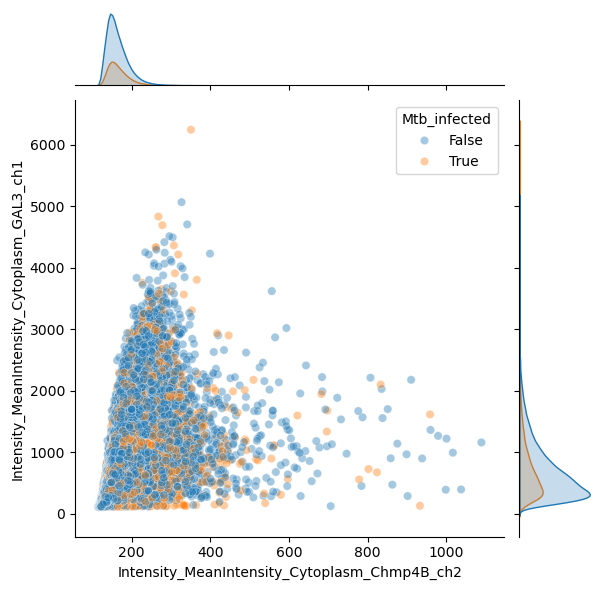

In [18]:
sns.jointplot(
    x="Intensity_MeanIntensity_Cytoplasm_Chmp4B_ch2",
    y="Intensity_MeanIntensity_Cytoplasm_GAL3_ch1",
    data=df,
    hue="Mtb_infected",
    kind="scatter",
    alpha= 0.4  # adjust transparency (0=transparent, 1=opaque)
)

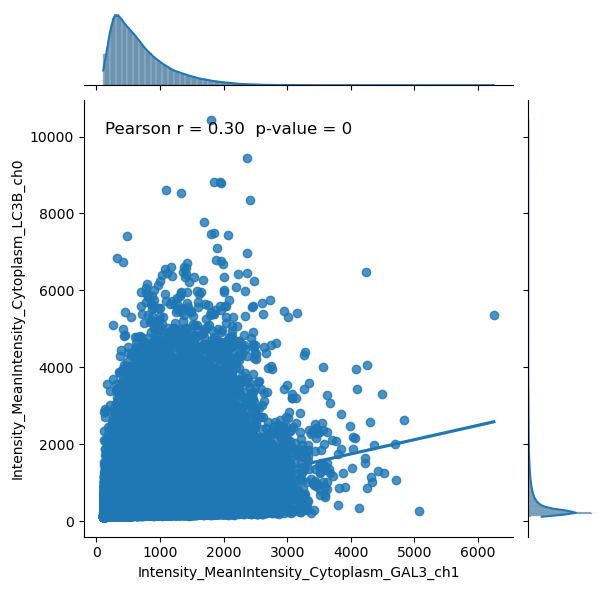

In [15]:
# Calculate Pearson r and p-value
r, p = pearsonr(df['Intensity_MeanIntensity_Cytoplasm_LC3B_ch0'], df['Intensity_MeanIntensity_Cytoplasm_GAL3_ch1'])

sns.jointplot(
    x="Intensity_MeanIntensity_Cytoplasm_GAL3_ch1",
    y="Intensity_MeanIntensity_Cytoplasm_LC3B_ch0",
    data=df,
    kind="reg",
)

# Annotate with Pearson r and p-value
plt.annotate(f'Pearson r = {r:.2f}  p-value = {p:.2g}',
             xy=(0.05, 0.95), xycoords='axes fraction',
             ha='left', va='top', fontsize=12)

plt.show()

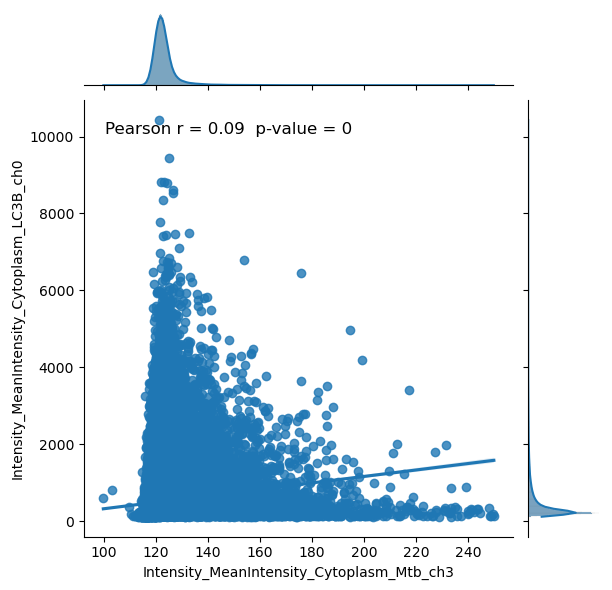

In [16]:
# Calculate Pearson r and p-value
r, p = pearsonr(df['Intensity_MeanIntensity_Cytoplasm_LC3B_ch0'], df['Intensity_MeanIntensity_Cytoplasm_Mtb_ch3'])

sns.jointplot(
    x="Intensity_MeanIntensity_Cytoplasm_Mtb_ch3",
    y="Intensity_MeanIntensity_Cytoplasm_LC3B_ch0",
    data=df,
    kind="reg",
)

# Annotate with Pearson r and p-value
plt.annotate(f'Pearson r = {r:.2f}  p-value = {p:.2g}',
             xy=(0.05, 0.95), xycoords='axes fraction',
             ha='left', va='top', fontsize=12)

plt.show()

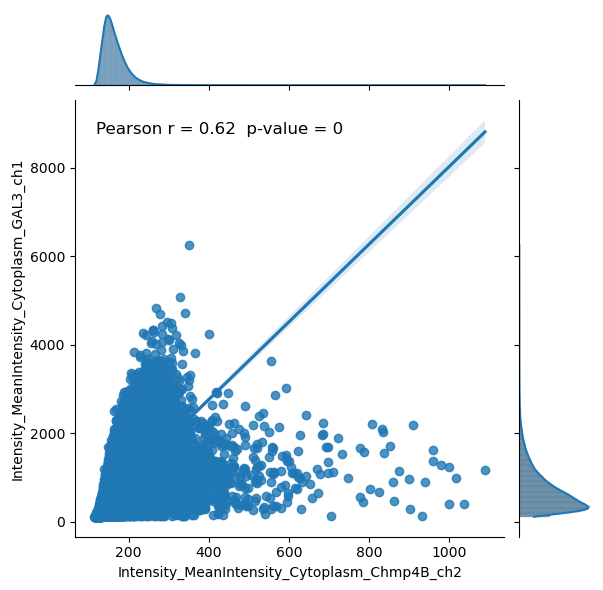

In [17]:
# Calculate Pearson r and p-value
r, p = pearsonr(df['Intensity_MeanIntensity_Cytoplasm_GAL3_ch1'], df['Intensity_MeanIntensity_Cytoplasm_Chmp4B_ch2'])

sns.jointplot(
    x="Intensity_MeanIntensity_Cytoplasm_Chmp4B_ch2",
    y="Intensity_MeanIntensity_Cytoplasm_GAL3_ch1",
    data=df,
    kind="reg",
)

# Annotate with Pearson r and p-value
plt.annotate(f'Pearson r = {r:.2f}  p-value = {p:.2g}',
             xy=(0.05, 0.95), xycoords='axes fraction',
             ha='left', va='top', fontsize=12)

plt.show()